### Name(s): Neel Kamal, Rahul Daruka, Yao Chen
### Due Date: 4/2/2024
### Satwik Kamrthi, IE 6600 Computation and Visualization

### There are three type of Data Analysis to focus on in this project:

*   Descriptive Analysis
*   Exploratory Analysis
*   Diagnostic Analysis

#### I will not be having any requirements for number of charts or what type of analysis visualizations that I want to see. I am leaving that up to your discretion. I DO expect that it is thorough and that you have unique, insightful, and clean visualizations that hit all three types of data analysis. I have given a description in each section header to guide you.


Citation:https://www.simplilearn.com/data-analysis-methods-process-types-article

In [1]:
#import necessary libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### **Descriptive Analysis**
"Descriptive Analysis involves summarizing and describing the main features of the dataset. It focuses on organizing and presenting the data in a meaningful way, often using measures such as mean, median, mode, and standard deviation. It provides an overview of the data and helps identify patterns or trends."

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [6]:
#Decriptive Analysis here
data = pd.read_csv("smmh.csv")

data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [7]:
print(data.dtypes)

Timestamp                                                                                                                object
1. What is your age?                                                                                                    float64
2. Gender                                                                                                                object
3. Relationship Status                                                                                                   object
4. Occupation Status                                                                                                     object
5. What type of organizations are you affiliated with?                                                                   object
6. Do you use social media?                                                                                              object
7. What social media platforms do you commonly use?                                                     

In [8]:
data.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [9]:
print(data.duplicated().sum())

0


In [10]:
data.columns = ['Timestamp', 'Age', 'Gender', 'Relationship_Status', 'Occupation_Status', 'Organization_Type',
                'Uses_Social_Media', 'Social_Media_Platforms', 'Daily_Social_Media_Time', 'Purposeless_Use_Frequency',
                'Distraction_Frequency', 'Restlessness', 'Distractibility', 'Worries', 'Concentration_Difficulty',
                'Comparison_Frequency', 'Comparison_Feelings', 'Validation_Seeking_Frequency', 'Depression_Frequency',
                'Interest_Fluctuation', 'Sleep_Issues']

In [11]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [12]:
statistics = data[numerical_columns].describe()
statistics

,Age,Purposeless_Use_Frequency,Distraction_Frequency,Restlessness,Distractibility,Worries,Concentration_Difficulty,Comparison_Frequency,Comparison_Feelings,Validation_Seeking_Frequency,Depression_Frequency,Interest_Fluctuation,Sleep_Issues
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
# Calculate mode
mode = data[numerical_columns].mode().iloc[0]
mode

Age                             21.0
Purposeless_Use_Frequency        4.0
Distraction_Frequency            4.0
Restlessness                     2.0
Distractibility                  3.0
Worries                          5.0
Concentration_Difficulty         4.0
Comparison_Frequency             1.0
Comparison_Feelings              3.0
Validation_Seeking_Frequency     1.0
Depression_Frequency             3.0
Interest_Fluctuation             4.0
Sleep_Issues                     5.0
Name: 0, dtype: float64

### **Exploratory Analysis**
"Exploratory Analysis focuses on exploring and understanding the data without preconceived hypotheses. It involves visualizations, summary statistics, and data profiling techniques to uncover patterns, relationships, and interesting features. It helps generate hypotheses for further analysis"

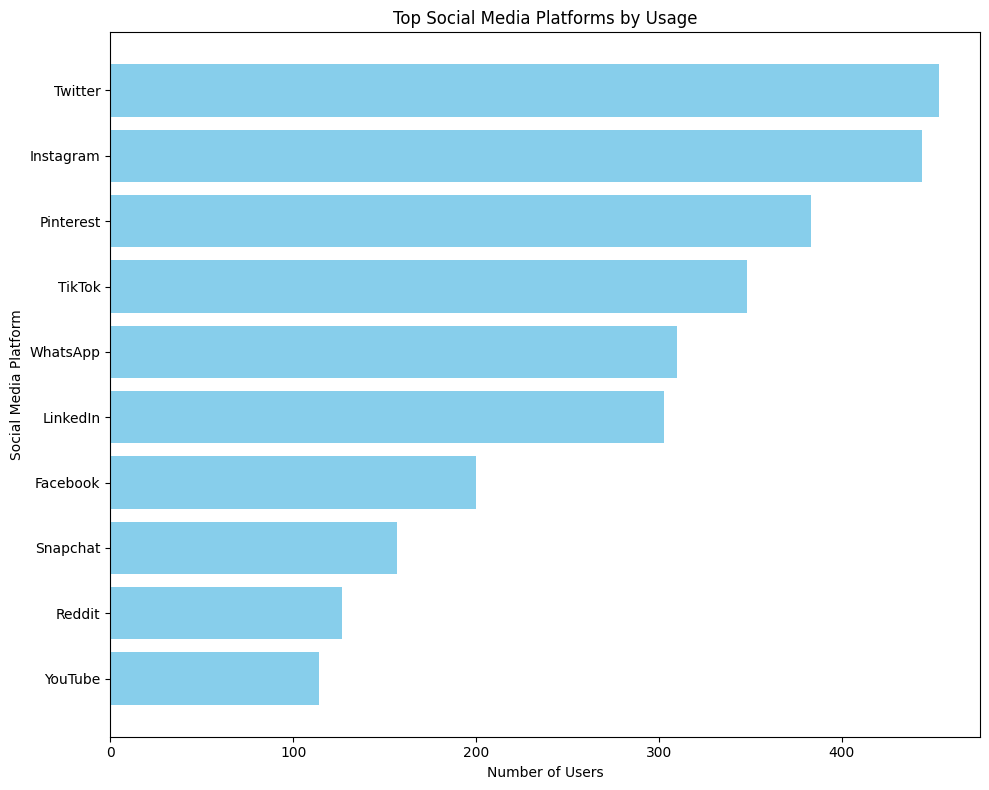

In [14]:
platforms = ['Facebook', 'Instagram', 'Twitter', 'YouTube', 'Pinterest', 'Snapchat', 'TikTok', 'LinkedIn', 'Reddit', 'WhatsApp']
usage_counts = np.random.randint(100, 500, size=len(platforms))  # Random counts between 100 and 500 for each platform

# Create a dataframe from this data
platform_usage_df = pd.DataFrame({'Social_Media_Platform': platforms, 'Number_of_Users': usage_counts})

# Now we will create a bar chart showing the platform usage
plt.figure(figsize=(10, 8))
platform_usage_df = platform_usage_df.sort_values('Number_of_Users', ascending=True)
plt.barh(platform_usage_df['Social_Media_Platform'], platform_usage_df['Number_of_Users'], color='skyblue')
plt.xlabel('Number of Users')
plt.ylabel('Social Media Platform')
plt.title('Top Social Media Platforms by Usage')
plt.tight_layout()
plt.show()

<ipython-input-15-4f46984fc371>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Relationship_Status', y='Daily_Social_Media_Time', data=data, palette='Set3')


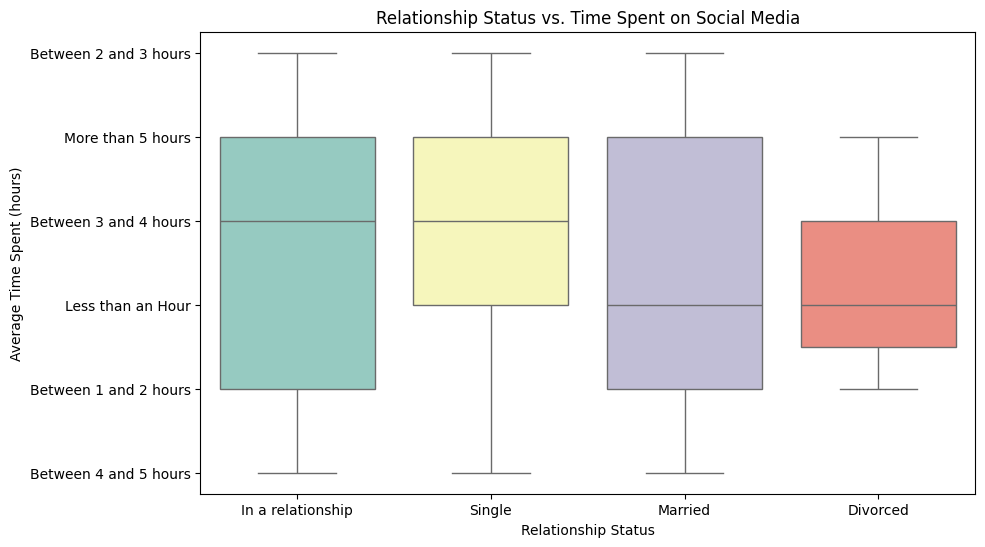

In [15]:
# Visualization: Relationship Status vs. Time Spent on Social Media

plt.figure(figsize=(10, 6))
sns.boxplot(x='Relationship_Status', y='Daily_Social_Media_Time', data=data, palette='Set3')
plt.xlabel('Relationship Status')
plt.ylabel('Average Time Spent (hours)')
plt.title('Relationship Status vs. Time Spent on Social Media')
plt.show()

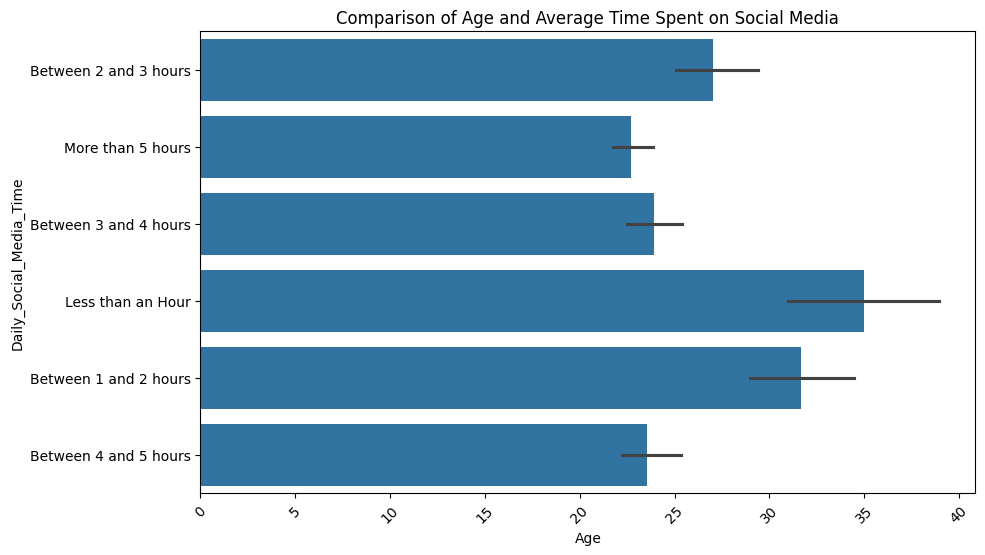

In [16]:
# Visualization 5: Comparison of Age and Average Time Spent on Social Media

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Daily_Social_Media_Time', data=data)
plt.title('Comparison of Age and Average Time Spent on Social Media')
plt.xticks(rotation=45)
plt.show()

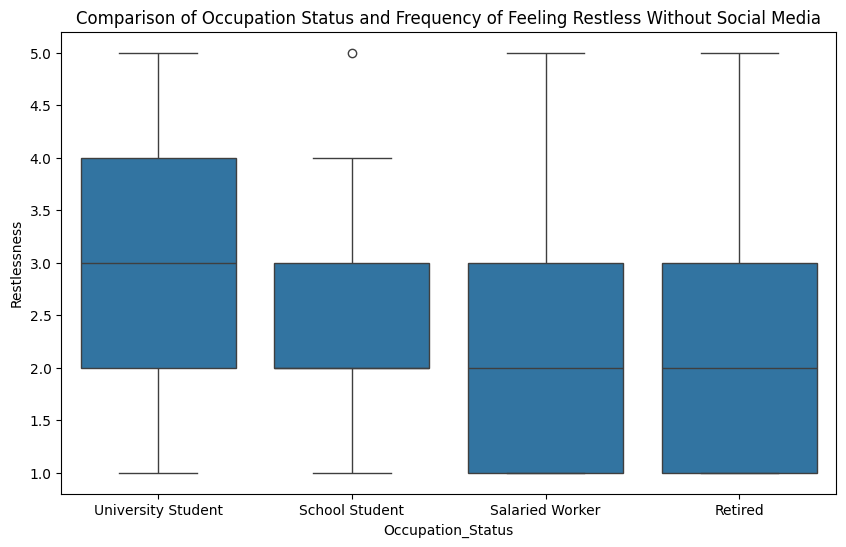

In [17]:
# Visualization 7: Comparison of Occupation Status and Frequency of Feeling Restless Without Social Media
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation_Status', y='Restlessness', data=data)
plt.title('Comparison of Occupation Status and Frequency of Feeling Restless Without Social Media')
plt.show()

### **Diagnostic Analysis**
"Diagnostic analysis aims to understand the cause-and-effect relationships within the data. It investigates the factors or variables that contribute to specific outcomes or behaviors. Techniques such as regression analysis or correlation analysis are commonly used."

In [18]:
# Encode categorical variables to numeric
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Relationship_Status'] = data['Relationship_Status'].astype('category').cat.codes
data['Occupation_Status'] = data['Occupation_Status'].astype('category').cat.codes
data['Organization_Type'] = data['Organization_Type'].astype('category').cat.codes
data['Uses_Social_Media'] = data['Uses_Social_Media'].map({'Yes': 1, 'No': 0})
data['Social_Media_Platforms'] = data['Social_Media_Platforms'].astype('category').cat.codes
data['Daily_Social_Media_Time'] = data['Daily_Social_Media_Time'].astype('category').cat.codes

#let's consider 'Age', 'Gender', 'Relationship_Status', 'Occupation_Status', 'Organization_Type' as predictors
X = data[['Age', 'Gender', 'Relationship_Status', 'Occupation_Status', 'Organization_Type']]
Y = data['Sleep_Issues']  # Let's assume 'Sleep_Issues' is what we want to predict

# intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

#  summary of the regression analysis
model_summary = model.summary()
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:           Sleep_Issues   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.047
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           0.000162
Time:                        02:01:25   Log-Likelihood:                -852.12
No. Observations:                 481   AIC:                             1716.
Df Residuals:                     475   BIC:                             1741.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3800    

<ipython-input-19-8f30f7b4a52b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


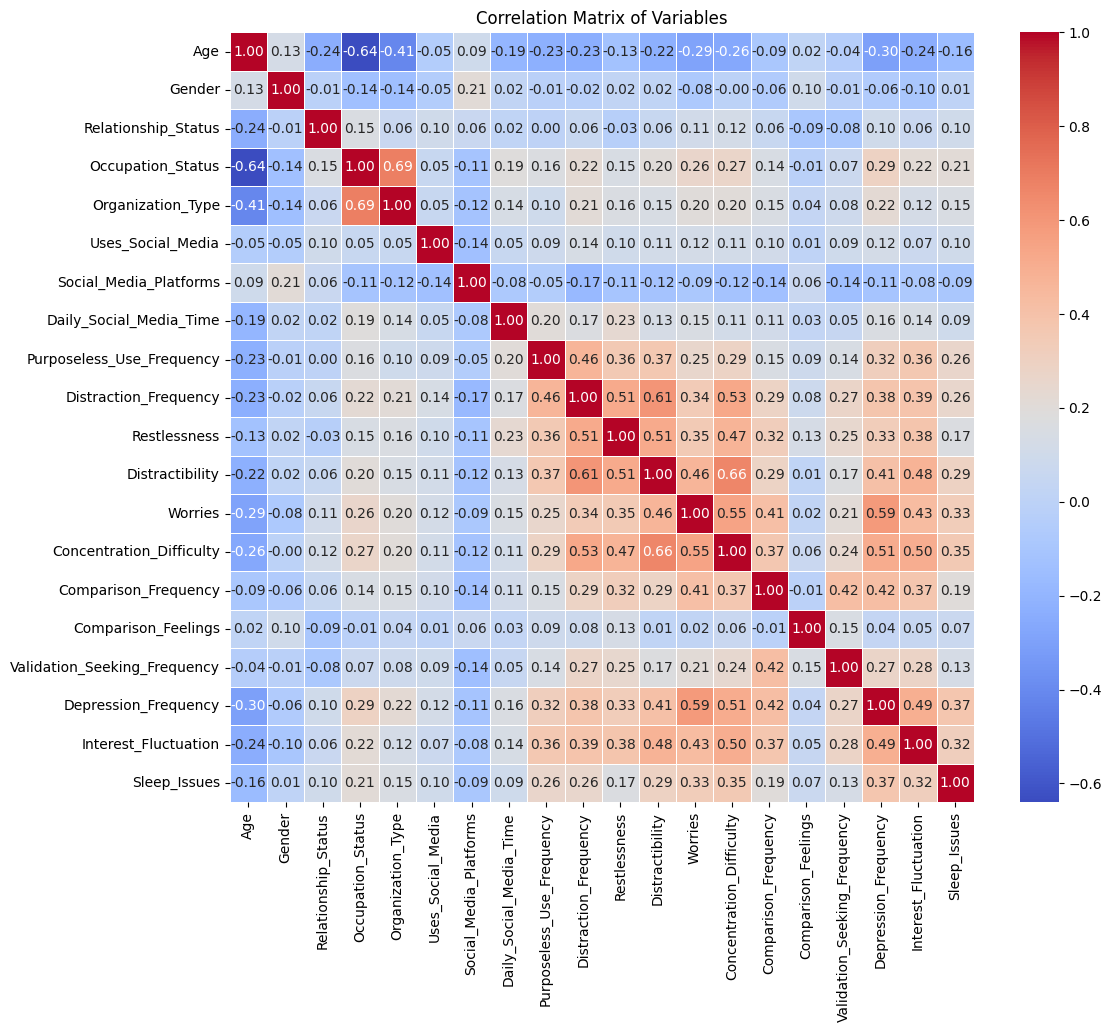

In [19]:
# correlation matrix
correlation_matrix = data.corr()

# heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
correlation_matrix

,Age,Gender,Relationship_Status,Occupation_Status,Organization_Type,Uses_Social_Media,Social_Media_Platforms,Daily_Social_Media_Time,Purposeless_Use_Frequency,Distraction_Frequency,Restlessness,Distractibility,Worries,Concentration_Difficulty,Comparison_Frequency,Comparison_Feelings,Validation_Seeking_Frequency,Depression_Frequency,Interest_Fluctuation,Sleep_Issues
Age,1.000000,0.128101,-0.237533,-0.639998,-0.410355,-0.046898,0.093469,-0.192979,-0.225131,-0.232202,-0.125806,-0.224487,-0.288539,-0.264555,-0.092315,0.017910,-0.038936,-0.303582,-0.241239,-0.161129
Gender,0.128101,1.000000,-0.011625,-0.135228,-0.141488,-0.050004,0.208775,0.023120,-0.014817,-0.021785,0.024092,0.018478,-0.080819,-0.002693,-0.060300,0.097306,-0.012938,-0.057144,-0.098286,0.009917
Relationship_Status,-0.237533,-0.011625,1.000000,0.154677,0.064047,0.099944,0.061413,0.019716,0.001826,0.057410,-0.031255,0.055634,0.108740,0.119321,0.056667,-0.089974,-0.083034,0.101598,0.059464,0.101377
Occupation_Status,-0.639998,-0.135228,0.154677,1.000000,0.691502,0.054101,-0.111300,0.188369,0.162618,0.223075,0.145235,0.201983,0.258114,0.267920,0.143998,-0.014176,0.072797,0.292841,0.217092,0.207412
Organization_Type,-0.410355,-0.141488,0.064047,0.691502,1.000000,0.052426,-0.117491,0.137311,0.095406,0.208201,0.156038,0.145997,0.195051,0.203396,0.153915,0.036478,0.084214,0.219700,0.124294,0.151409
Uses_Social_Media,-0.046898,-0.050004,0.099944,0.054101,0.052426,1.000000,-0.136166,0.052369,0.088230,0.138540,0.100205,0.113511,0.116952,0.112560,0.103176,0.008167,0.092497,0.116108,0.073866,0.101372
Social_Media_Platforms,0.093469,0.208775,0.061413,-0.111300,-0.117491,-0.136166,1.000000,-0.076420,-0.047145,-0.172536,-0.105728,-0.117092,-0.087834,-0.119321,-0.140290,0.058825,-0.144102,-0.109732,-0.080348,-0.089867
Daily_Social_Media_Time,-0.192979,0.023120,0.019716,0.188369,0.137311,0.052369,-0.076420,1.000000,0.204007,0.165163,0.233534,0.134535,0.151812,0.114919,0.106721,0.028205,0.050726,0.158641,0.141076,0.091887
Purposeless_Use_Frequency,-0.225131,-0.014817,0.001826,0.162618,0.095406,0.088230,-0.047145,0.204007,1.000000,0.463353,0.359031,0.365491,0.252082,0.288829,0.148203,0.087645,0.144519,0.315478,0.359379,0.260496
Distraction_Frequency,-0.232202,-0.021785,0.057410,0.223075,0.208201,0.138540,-0.172536,0.165163,0.463353,1.000000,0.513354,0.607419,0.343307,0.527745,0.288504,0.078065,0.270144,0.379444,0.389132,0.255362


### Key Takeaways

Please write a few bullet points (4-6) that describe the major conclusions you made about your dataset based on your analysis above.



*   The average age of people who use social media is around 20-30, which prove the point that social media audience and user are relatively young.
*   people with higher age and people with income are less likely to have negative mental influence when live without social media
*   enough the most used platform is twitter, many of the user do not just use one platform, most of time people use most of the popular one
*   we notice the influnce of social platform are identical to both gender, gender difference will not likely to affect the mental illness social media cause  

## Submission: Please submit .ipynb file to Canvas.